In [32]:
import pandas as pd 

In [311]:
data = pd.read_csv('small_data.csv')
dropped_data = data.dropna()

In [312]:
dropped_data

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...,...
416,LUNG1-417,65.5616,4.0,2,0,IIIb,squamous cell carcinoma,male,648,1
417,LUNG1-418,53.6712,2.0,0,0,I,adenocarcinoma,male,346,1
418,LUNG1-419,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,2772,0
419,LUNG1-420,73.3808,2.0,1,0,II,squamous cell carcinoma,male,2429,1


In [314]:
dropped_data.set_index('PatientID', inplace=True)

In [316]:
dropped_data = dropped_data[dropped_data['Histology'] != 'nos']

In [320]:
dropped_data

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
PatientID,,,,,,,,,
LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...
LUNG1-417,65.5616,4.0,2,0,IIIb,squamous cell carcinoma,male,648,1
LUNG1-418,53.6712,2.0,0,0,I,adenocarcinoma,male,346,1
LUNG1-419,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,2772,0


In [328]:
import pandas as pd
dropped_data.to_csv('cleaned_data.csv')

In [322]:
numerical_features = ['age']
ordinal_features = ['clinical.T.Stage', 'clinical.N.Stage', 'clinical.M.Stage','Overall.Stage']
categorical_features = ['Histology','gender']



In [323]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sksurv.ensemble import RandomSurvivalForest
import numpy as np
import pandas as pd

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[ 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])
log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True)) 
])
dates_transformer = Pipeline(steps=[
    ('dates', FunctionTransformer(pd.to_datetime, validate=True))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        #('date', dates_transformer, ['date']),
        #('log', log_transformer, log_transform_features)
    ]
)


final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])




In [324]:
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Histology', 'gender']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['clinical.T.Stage',
                                                   'clinical.N.Stage',
                                                   'clinical.M.Stage',
                                                   'Overall.Stage'])]))])

In [35]:
dropped_data.Histology.unique()

array(['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos'],
      dtype=object)

In [36]:
# drop where Histology is nos
dropped_data = dropped_data[dropped_data.Histology != 'nos']

In [37]:
dropped_data.columns

Index(['PatientID', 'age', 'clinical.T.Stage', 'Clinical.N.Stage',
       'Clinical.M.Stage', 'Overall.Stage', 'Histology', 'gender',
       'Survival.time', 'deadstatus.event'],
      dtype='object')

In [38]:
categorical_data = ['Histology','Overall.Stage','gender']
numerical_data = ['age', 'clinical.T.Stage', 'Clinical.N.Stage','Clinical.M.Stage']
dropped_data = pd.get_dummies(dropped_data, columns=categorical_data)

In [39]:
# index on patient id
dropped_data = dropped_data.set_index('PatientID')

In [40]:
target = dropped_data[['Survival.time','deadstatus.event']]
data = dropped_data.drop(['Survival.time','deadstatus.event'],axis=1)

In [ ]:
input

In [43]:
input

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,Histology_adenocarcinoma,Histology_large cell,Histology_squamous cell carcinoma,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIa,Overall.Stage_IIIb,gender_female,gender_male
PatientID,,,,,,,,,,,,,,
LUNG1-001,78.7515,2.0,3,0,2165,False,True,False,False,False,False,True,False,True
LUNG1-002,83.8001,2.0,0,0,155,False,False,True,True,False,False,False,False,True
LUNG1-003,68.1807,2.0,3,0,256,False,True,False,False,False,False,True,False,True
LUNG1-004,70.8802,2.0,1,0,141,False,False,True,False,True,False,False,False,True
LUNG1-005,80.4819,4.0,2,0,353,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUNG1-417,65.5616,4.0,2,0,648,False,False,True,False,False,False,True,False,True
LUNG1-418,53.6712,2.0,0,0,346,True,False,False,True,False,False,False,False,True
LUNG1-419,66.5096,4.0,1,0,2772,False,False,True,False,False,False,True,False,True


In [44]:
from pycaret.regression import setup, compare_models
reg1 = setup(input, target = 'Survival.time', session_id=123, log_experiment=False, experiment_name='smalldata')

,Description,Value
0,Session id,123
1,Target,Survival.time
2,Target type,Regression
3,Original data shape,"(307, 14)"
4,Transformed data shape,"(307, 14)"
5,Transformed train set shape,"(214, 14)"
6,Transformed test set shape,"(93, 14)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [45]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,787.8702,979747.5502,988.5006,0.0101,1.2475,2.8331,0.0060
br,Bayesian Ridge,789.6298,981962.1962,989.4985,0.0086,1.2514,2.8722,0.0120
dummy,Dummy Regressor,800.8826,1010510.3304,1003.3726,-0.0181,1.2690,3.0657,0.0080
en,Elastic Net,797.6616,1008770.9758,1002.9301,-0.0189,1.2599,2.8506,0.0060
ada,AdaBoost Regressor,868.3298,1093008.2214,1043.6862,-0.1097,1.3497,3.4132,0.0080
ridge,Ridge Regression,829.2837,1118712.9969,1054.9372,-0.1262,1.3098,2.9138,0.0060
lasso,Lasso Regression,830.8567,1124865.5719,1057.6976,-0.1321,1.3648,2.9157,0.1620
llar,Lasso Least Angle Regression,830.8531,1124856.6957,1057.6935,-0.1321,1.3651,2.9156,0.0060
lar,Least Angle Regression,832.4914,1130229.1511,1060.1505,-0.1373,1.3193,2.9190,0.0060
lr,Linear Regression,832.7455,1131023.5655,1060.5014,-0.1380,1.3170,2.9203,0.4920


In [46]:
input

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,Histology_adenocarcinoma,Histology_large cell,Histology_squamous cell carcinoma,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIa,Overall.Stage_IIIb,gender_female,gender_male
PatientID,,,,,,,,,,,,,,
LUNG1-001,78.7515,2.0,3,0,2165,False,True,False,False,False,False,True,False,True
LUNG1-002,83.8001,2.0,0,0,155,False,False,True,True,False,False,False,False,True
LUNG1-003,68.1807,2.0,3,0,256,False,True,False,False,False,False,True,False,True
LUNG1-004,70.8802,2.0,1,0,141,False,False,True,False,True,False,False,False,True
LUNG1-005,80.4819,4.0,2,0,353,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUNG1-417,65.5616,4.0,2,0,648,False,False,True,False,False,False,True,False,True
LUNG1-418,53.6712,2.0,0,0,346,True,False,False,True,False,False,False,False,True
LUNG1-419,66.5096,4.0,1,0,2772,False,False,True,False,False,False,True,False,True


In [47]:
from sklearn.model_selection import train_test_split
input_data, target_data = input.drop('Survival.time', axis=1), input['Survival.time']
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)

In [48]:
# Search Grid 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'criterion': ['mse', 'poisson']
}
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'poisson'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [49]:
best_params = grid_search.best_params_
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)


RandomForestRegressor(criterion='poisson', max_depth=10, n_estimators=300)

In [50]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_features="sqrt", n_jobs=-1, random_state=42)


In [51]:
from sksurv.datasets import load_veterans_lung_cancer
data_x, data_y = load_veterans_lung_cancer()

In [58]:
data_y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [56]:
input_data, target_data = dropped_data.drop(['Survival.time','deadstatus.event'], axis=1), dropped_data[['Survival.time','deadstatus.event']]


In [86]:
target = Surv.from_arrays(
    event=target_data['deadstatus.event'].astype(bool),
    time=target_data['Survival.time']
)


In [87]:
target

array([( True, 2165.), ( True,  155.), ( True,  256.), ( True,  141.),
       ( True,  353.), ( True,  173.), ( True,  137.), ( True,   77.),
       ( True,  131.), (False, 2119.), ( True,  515.), ( True,   85.),
       ( True, 1247.), ( True, 1238.), ( True,  220.), ( True, 1926.),
       ( True,  442.), ( True, 1141.), ( True, 1883.), ( True,   25.),
       (False, 1972.), ( True,  257.), ( True,  303.), ( True,  999.),
       ( True,  543.), ( True,  456.), ( True,  597.), ( True,   98.),
       ( True,  366.), ( True,  464.), ( True,  370.), ( True,  558.),
       ( True,  136.), ( True,  134.), ( True,  183.), ( True, 1070.),
       ( True,   73.), (False, 1810.), (False, 4328.), ( True, 1670.),
       ( True,  208.), ( True,   73.), ( True,   78.), ( True, 1076.),
       ( True,  192.), ( True,  673.), ( True,   51.), (False, 1573.),
       (False, 1630.), ( True,  632.), ( True,  916.), ( True, 2059.),
       ( True,  287.), ( True,  128.), ( True,   58.), ( True, 1599.),
      

In [88]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2)

In [89]:
y_train

array([( True,  208.), ( True,  298.), ( True, 1599.), ( True, 1926.),
       ( True,  192.), ( True,  257.), ( True,  137.), ( True,   73.),
       ( True,  203.), ( True,  703.), ( True, 2429.), ( True,  639.),
       ( True,   18.), ( True,  107.), ( True, 3017.), ( True,  280.),
       ( True,  243.), ( True, 1581.), (False,  314.), (False, 1517.),
       ( True,  491.), ( True,   65.), ( True,  468.), ( True,  456.),
       ( True,  287.), ( True,  161.), ( True,  353.), ( True,  485.),
       ( True,  261.), ( True, 1286.), ( True,  256.), ( True,  367.),
       ( True,  575.), ( True,  321.), ( True,   25.), ( True,  291.),
       ( True,  292.), ( True,  284.), ( True, 2165.), ( True,  456.),
       ( True,  217.), ( True, 1362.), ( True,   96.), ( True,   98.),
       ( True,  412.), ( True, 2490.), ( True, 1636.), ( True,  303.),
       ( True, 1357.), ( True,  128.), ( True,  799.), (False, 3480.),
       ( True,  166.), ( True,  907.), ( True,  492.), ( True,  249.),
      

In [90]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
param_grid = {
    
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=3, min_samples_leaf=3, max_features="sqrt", n_jobs=-1, random_state=42)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_split=3, n_jobs=-1, random_state=42)

In [91]:
rsf.score(X_test, y_test)

0.5662878787878788

In [100]:
from sksurv.metrics import concordance_index_censored
rsf = RandomSurvivalForest(n_jobs=-1, random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2", None]
}

# Custom scorer using Concordance Index
def concordance_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    result = concordance_index_censored(y["event"], y["time"], predictions)
    return result[0]  # Concordance index is the first element of the result

# Perform Grid Search with custom scoring
grid_search = GridSearchCV(
    estimator=rsf,
    param_grid=param_grid,
    scoring=concordance_scorer,  # Use concordance index as scoring
    cv=5,  # 5-fold cross-validation
    verbose=4
)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.432 total time=   0.1s
[CV 2/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.473 total time=   0.0s
[CV 3/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.459 total time=   0.0s
[CV 4/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.516 total time=   0.0s
[CV 5/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.499 total time=   0.0s
[CV 1/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.433 total time=   0.1s
[CV 2/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.467 total time=   0.1s
[CV 3/5] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

GridSearchCV(cv=5, estimator=RandomSurvivalForest(n_jobs=-1, random_state=42),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=<function concordance_scorer at 0x3100b12d0>, verbose=4)

In [101]:
print("Best Parameters:", grid_search.best_params_)
best_model = RandomSurvivalForest(n_jobs=-1, random_state=42, **grid_search.best_params_)
best_model.fit(X_train, y_train)

# Evaluate the best model
c_index = concordance_index_censored(y_test["event"], y_test["time"], best_model.predict(X_test))
print("Concordance Index on Test Data:", c_index[0])

Best Parameters: {'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Concordance Index on Test Data: 0.4945887445887446


In [102]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis, GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [1, 3, 5]
}

est_cph_tree = GradientBoostingSurvivalAnalysis(random_state=0)
grid_search = GridSearchCV(estimator=est_cph_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingSurvivalAnalysis(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]})

In [103]:
print("Best Parameters:", grid_search.best_params_)
best_model = GradientBoostingSurvivalAnalysis(random_state=0, **grid_search.best_params_)
best_model.fit(X_train, y_train)


Best Parameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 200}


GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=5,
                                 n_estimators=200, random_state=0)

In [104]:
best_model.score(X_test, y_test)

0.5113636363636364

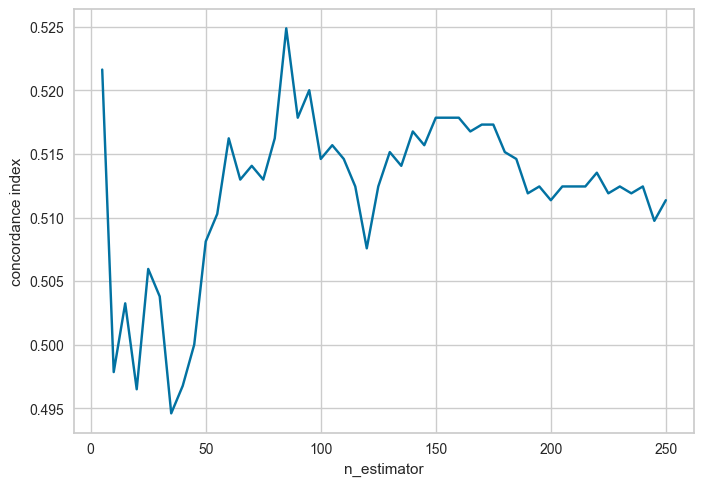

In [106]:
import matplotlib.pyplot as plt
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=5, random_state=0)
for i in range(1, 51):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_test, y_test)


x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

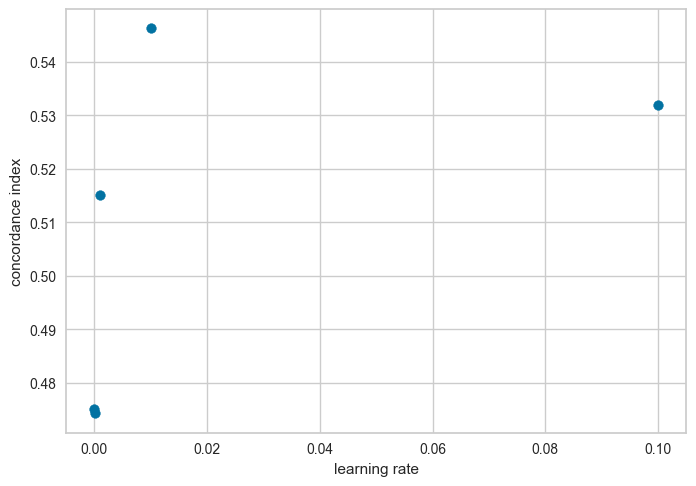

In [110]:
import matplotlib.pyplot as plt
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=80, max_depth=5, random_state=0)
for i in range(1,6):
    learning_rate = 10 ** -i
    est_cph_tree.set_params(learning_rate=learning_rate)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[learning_rate] = est_cph_tree.score(X_test, y_test)


x, y = zip(*scores_cph_tree.items())
plt.scatter(x, y)
plt.xlabel("learning rate")
plt.ylabel("concordance index")
plt.grid(True)

In [112]:
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=80, max_depth=5, random_state=0,learning_rate=0.01)
est_cph_tree.fit(X_train, y_train)
est_cph_tree.score(X_test, y_test)

0.5462662337662337

In [113]:
target

array([( True, 2165.), ( True,  155.), ( True,  256.), ( True,  141.),
       ( True,  353.), ( True,  173.), ( True,  137.), ( True,   77.),
       ( True,  131.), (False, 2119.), ( True,  515.), ( True,   85.),
       ( True, 1247.), ( True, 1238.), ( True,  220.), ( True, 1926.),
       ( True,  442.), ( True, 1141.), ( True, 1883.), ( True,   25.),
       (False, 1972.), ( True,  257.), ( True,  303.), ( True,  999.),
       ( True,  543.), ( True,  456.), ( True,  597.), ( True,   98.),
       ( True,  366.), ( True,  464.), ( True,  370.), ( True,  558.),
       ( True,  136.), ( True,  134.), ( True,  183.), ( True, 1070.),
       ( True,   73.), (False, 1810.), (False, 4328.), ( True, 1670.),
       ( True,  208.), ( True,   73.), ( True,   78.), ( True, 1076.),
       ( True,  192.), ( True,  673.), ( True,   51.), (False, 1573.),
       (False, 1630.), ( True,  632.), ( True,  916.), ( True, 2059.),
       ( True,  287.), ( True,  128.), ( True,   58.), ( True, 1599.),
      

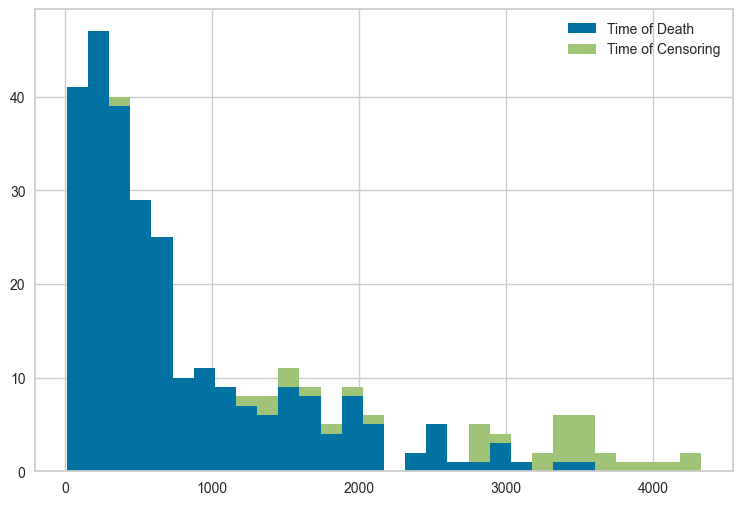

In [115]:
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist(
    (target["time"][target["event"]], target["time"][~target["event"]]), bins=30, stacked=True
)
_ = plt.legend(patches, ["Time of Death", "Time of Censoring"])

In [237]:
import pandas as pd 

data = pd.read_csv('data_0 (2).csv')
data.dropna(inplace=True)

In [238]:
data

,Unnamed: 0,Age at Histological Diagnosis,Pack Years,Quit Smoking Year,Date of Last Known Alive,Time to Death (days),CT Date,Days between CT and surgery,PET Date,Patient affiliation_Stanford,...,Tumor Location (choice=L Lingula)_Checked,Tumor Location (choice=L Lingula)_Unchecked,Survival Status_Alive,Survival Status_Dead,Smoking status_Current,Smoking status_Former,Smoking status_Nonsmoker,Histology _Adenocarcinoma,Histology _NSCLC NOS (not otherwise specified),Histology _Squamous cell carcinoma
0,0,79,37,1967.0,36198,3000.0,33120,42,33161,True,...,False,True,True,False,False,True,False,True,False,False
1,1,65,0,1900.0,33204,3000.0,33134,23,33155,True,...,False,True,True,False,False,False,True,True,False,False
2,2,65,38,1900.0,34246,3000.0,33580,25,33589,False,...,False,True,True,False,True,False,False,True,False,False
3,3,67,10,1965.0,34660,3000.0,33488,89,33526,False,...,False,True,True,False,False,True,False,False,False,True
4,4,84,20,1951.0,34851,1456.0,33303,92,33345,True,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,75,55,1994.0,34891,3000.0,34660,14,34652,True,...,False,True,True,False,False,True,False,False,False,True
153,153,61,12,1993.0,36342,3000.0,34191,72,34232,False,...,False,True,True,False,False,True,False,True,False,False
154,154,52,7,1900.0,36250,3000.0,35044,8,34966,True,...,False,True,True,False,False,True,False,True,False,False
155,155,67,15,1966.0,35709,671.0,34973,65,35015,True,...,False,True,False,True,False,True,False,True,False,False


In [239]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [240]:
data

,Age at Histological Diagnosis,Pack Years,Quit Smoking Year,Date of Last Known Alive,Time to Death (days),CT Date,Days between CT and surgery,PET Date,Patient affiliation_Stanford,Patient affiliation_VA,...,Tumor Location (choice=L Lingula)_Checked,Tumor Location (choice=L Lingula)_Unchecked,Survival Status_Alive,Survival Status_Dead,Smoking status_Current,Smoking status_Former,Smoking status_Nonsmoker,Histology _Adenocarcinoma,Histology _NSCLC NOS (not otherwise specified),Histology _Squamous cell carcinoma
0,79,37,1967.0,36198,3000.0,33120,42,33161,True,False,...,False,True,True,False,False,True,False,True,False,False
1,65,0,1900.0,33204,3000.0,33134,23,33155,True,False,...,False,True,True,False,False,False,True,True,False,False
2,65,38,1900.0,34246,3000.0,33580,25,33589,False,True,...,False,True,True,False,True,False,False,True,False,False
3,67,10,1965.0,34660,3000.0,33488,89,33526,False,True,...,False,True,True,False,False,True,False,False,False,True
4,84,20,1951.0,34851,1456.0,33303,92,33345,True,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,75,55,1994.0,34891,3000.0,34660,14,34652,True,False,...,False,True,True,False,False,True,False,False,False,True
153,61,12,1993.0,36342,3000.0,34191,72,34232,False,True,...,False,True,True,False,False,True,False,True,False,False
154,52,7,1900.0,36250,3000.0,35044,8,34966,True,False,...,False,True,True,False,False,True,False,True,False,False
155,67,15,1966.0,35709,671.0,34973,65,35015,True,False,...,False,True,False,True,False,True,False,True,False,False


In [286]:
def f(serie):
    return 0 if serie == 3000.0 else 1

data['event'] = data['Time to Death (days)'].apply(f)

In [242]:
import datetime 
date1 = datetime.datetime.strptime('2019-01-01', '%Y-%m-%d')
date2 = datetime.datetime.strptime('2021-01-01', '%Y-%m-%d')
(date1 - date2).days

-731

In [287]:
data

,Age at Histological Diagnosis,Pack Years,Quit Smoking Year,Date of Last Known Alive,Time to Death (days),CT Date,Days between CT and surgery,PET Date,Patient affiliation_Stanford,Patient affiliation_VA,...,Tumor Location (choice=L Lingula)_Unchecked,Survival Status_Alive,Survival Status_Dead,Smoking status_Current,Smoking status_Former,Smoking status_Nonsmoker,Histology _Adenocarcinoma,Histology _NSCLC NOS (not otherwise specified),Histology _Squamous cell carcinoma,event
0,79,37,1967.0,36198,3000.0,33120,42,33161,True,False,...,True,True,False,False,True,False,True,False,False,0
1,65,0,1900.0,33204,3000.0,33134,23,33155,True,False,...,True,True,False,False,False,True,True,False,False,0
2,65,38,1900.0,34246,3000.0,33580,25,33589,False,True,...,True,True,False,True,False,False,True,False,False,0
3,67,10,1965.0,34660,3000.0,33488,89,33526,False,True,...,True,True,False,False,True,False,False,False,True,0
4,84,20,1951.0,34851,1456.0,33303,92,33345,True,False,...,True,False,True,False,True,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,75,55,1994.0,34891,3000.0,34660,14,34652,True,False,...,True,True,False,False,True,False,False,False,True,0
153,61,12,1993.0,36342,3000.0,34191,72,34232,False,True,...,True,True,False,False,True,False,True,False,False,0
154,52,7,1900.0,36250,3000.0,35044,8,34966,True,False,...,True,True,False,False,True,False,True,False,False,0
155,67,15,1966.0,35709,671.0,34973,65,35015,True,False,...,True,False,True,False,True,False,True,False,False,1


In [288]:
data.columns

Index(['Age at Histological Diagnosis', 'Pack Years', 'Quit Smoking Year',
       'Date of Last Known Alive', 'Time to Death (days)', 'CT Date',
       'Days between CT and surgery', 'PET Date',
       'Patient affiliation_Stanford', 'Patient affiliation_VA',
       'Gender_Female', 'Gender_Male', 'Ethnicity_African-American',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic/Latino',
       'Ethnicity_Native Hawaiian/Pacific Islander', 'Adjuvant Treatment_No',
       'Adjuvant Treatment_Yes', 'Chemotherapy_No', 'Chemotherapy_Yes',
       'Radiation_No', 'Radiation_Yes', 'Recurrence_no', 'Recurrence_yes',
       'Tumor Location (choice=RUL)_Checked',
       'Tumor Location (choice=RUL)_Unchecked',
       'Tumor Location (choice=RML)_Checked',
       'Tumor Location (choice=RML)_Unchecked',
       'Tumor Location (choice=RLL)_Checked',
       'Tumor Location (choice=RLL)_Unchecked',
       'Tumor Location (choice=LUL)_Checked',
       'Tumor Location (choice=LUL)_Unch

In [289]:
target = Surv.from_arrays(event=data['event'].astype(bool), time=data['Time to Death (days)'])
input_data = data.drop(['Time to Death (days)','event'], axis=1)

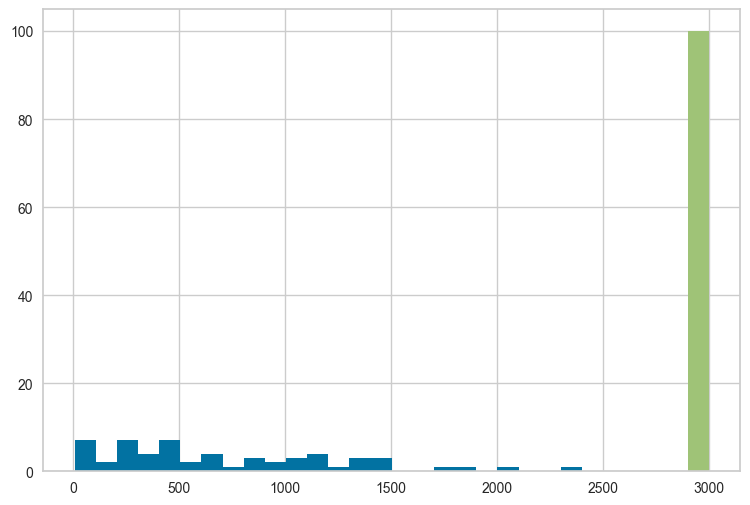

In [290]:
# plot target distribution
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist(
    (target["time"][target["event"]], target["time"][~target["event"]]), bins=30, stacked=True
)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2)

In [301]:
model= RandomSurvivalForest(
        n_estimators=200,
        min_samples_split=3,
        min_samples_leaf=3,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    )
model.fit(X_train, y_train)

RandomSurvivalForest(min_samples_split=3, n_estimators=200, n_jobs=-1,
                     random_state=42)

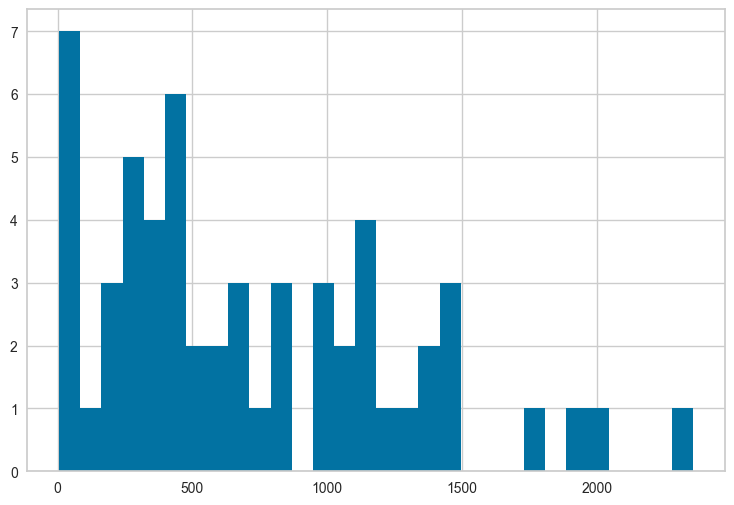

In [299]:
# plot y_train hist 
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist( (target["time"][target["event"]]), bins=30, stacked=True)

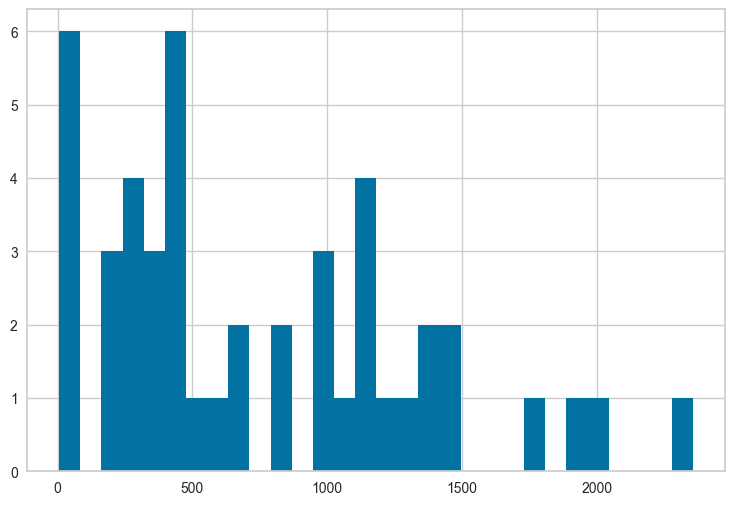

In [307]:
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist( (y_train['time'][y_train["event"]]), bins=30, stacked=True)

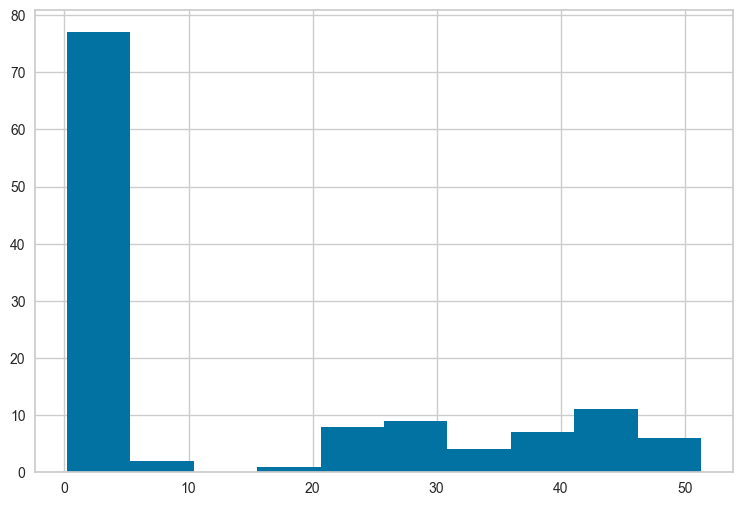

In [308]:
predictions = model.predict(X_train)
# Plot predictions hist
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist(predictions)

In [146]:
ordinal_features = ['clinical.T.Stage', 'Clinical.N.Stage','Clinical.M.Stage','Overall.Stage']
categorical_features = ['Histology','gender']
numerical_features = ['Age at Histological Diagnosis',]


In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sksurv.ensemble import RandomSurvivalForest
import numpy as np
import pandas as pd

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[ 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])
log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True)) 
])
dates_transformer = Pipeline(steps=[
    ('dates', FunctionTransformer(pd.to_datetime, validate=True))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('date', dates_transformer, ['date']),
        #('log', log_transformer, log_transform_features)
    ]
)


final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomSurvivalForest(
        n_estimators=80,
        min_samples_split=3,
        min_samples_leaf=3,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    ))
])

final_pipeline.fit(X_train, y_train)
predictions = final_pipeline.predict(X_test)



In [274]:
model= RandomSurvivalForest(
        n_estimators=200,
        min_samples_split=3,
        min_samples_leaf=3,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    )

In [275]:
model.fit(X_train, y_train) 

RandomSurvivalForest(min_samples_split=3, n_estimators=200, n_jobs=-1,
                     random_state=42)

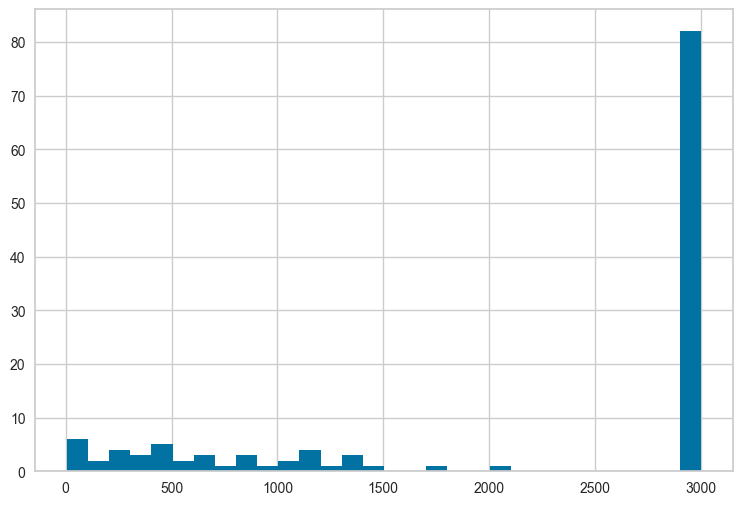

In [276]:
# plot y_train distribution 

plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist(
    (y_train["time"][y_train["event"]], y_train["time"][~y_train["event"]]), bins=30, stacked=True
)

In [259]:
model.predict(X_train), y_train

(array([ 5.15350594,  2.79104027,  3.33110844,  1.79760142,  1.88232094,
         2.2118826 , 25.78904032,  3.10942789, 27.44647991,  2.03667943,
        48.11950833,  2.89323617, 43.80112195,  2.64261074,  2.12873833,
         2.5274623 , 48.42707599, 51.66335789,  4.81164673,  1.67493579,
         3.82073858,  1.75009348, 31.67510449,  2.48760204,  2.25024038,
         3.34783686, 51.24452739,  1.82171369,  2.82968994,  1.61083999,
        43.11984728,  1.51090277, 43.77728326, 46.58435234,  4.1994094 ,
         3.30264575,  4.72581011,  1.8050309 , 35.43960889,  2.7512434 ,
         2.60769991,  3.76914655,  2.3893576 ,  3.51554695,  3.0776912 ,
         1.62219603, 46.96992024, 24.77781885,  2.44463288,  1.82933054,
         2.09582585, 33.12741129,  3.08147246,  1.461866  , 44.24033941,
        34.33029309, 48.0892176 , 25.06453036,  3.2783159 ,  1.91225425,
         2.1666788 ,  2.30272576, 39.37921928, 57.51440709,  4.77987449,
        30.02861507,  1.96821547,  2.41401107,  4.2

In [166]:
y = pd.DataFrame({ })
y['event'], y['time'] = zip(*y_test)

In [167]:
y

,event,time
0,True,195.0
1,False,1810.0
2,True,2481.0
3,True,70.0
4,True,1636.0
...,...,...
68,True,886.0
69,True,25.0
70,True,1525.0
71,True,635.0


In [168]:
from sksurv.metrics import concordance_index_censored
c_index = concordance_index_censored(y["event"], y["time"], predictions)

In [169]:
c_index

(0.455723124516628, 1178, 1407, 1, 0)

In [180]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
cox_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CoxPHSurvivalAnalysis())
])
cox_pipeline.fit(X_train, y_train)
risk_scores = cox_pipeline.predict(X_test)


In [176]:
risk_df = pd.DataFrame({'PatientID': X_test.index, 'RiskScore': risk_scores})
risk_df_sorted = risk_df.sort_values(by='RiskScore', ascending=False)

print(risk_df_sorted)

    PatientID  RiskScore
17  LUNG1-098  -1.493264
63  LUNG1-222  -1.571971
37  LUNG1-190  -1.573703
56  LUNG1-010  -1.588224
13  LUNG1-005  -1.612771
..        ...        ...
34  LUNG1-247  -2.453866
19  LUNG1-089  -2.491674
52  LUNG1-140  -2.531228
27  LUNG1-025  -2.571498
61  LUNG1-106  -2.814926

[73 rows x 2 columns]


In [179]:
cox_pipeline.named_steps['model']

CoxPHSurvivalAnalysis()

In [184]:
survival_probabilities = cox_pipeline.predict_survival_function(X_test)



In [309]:
from sksurv.linear_model import CoxPHSurvivalAnalysis 
model = CoxPHSurvivalAnalysis()
model.fit(X_train, y_train)

 ** On entry to DGECON parameter number  5 had an illegal value


ValueError: LAPACK reported an illegal value in 5-th argument.